In [1]:
from Rebalancing_function import rebalance_portfolio
import pandas as pd
import yfinance as yf

c:\Users\josh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Simple Tryout not logical, but the result make sense

# Define portfolio allocations
allocations_A = {'Equities': 0.10, 'HighYieldBonds': 0.4, 'InvGradeBonds': 0.5}
allocations_B = {'Equities': 0.10, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.9}
allocations_C = {'Equities': 0.15, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.85}
allocations_D = {'Equities': 0.15, 'HighYieldBonds': 0.35, 'InvGradeBonds': 0.5}

# Create a DataFrame using the allocation variables
allocations_df = pd.DataFrame({
    'Asset': ['Equities', 'HighYieldBonds', 'InvGradeBonds'],
    'ETFs': ['SPY', 'JNK', 'AGG'],
    'Allocation_A': [allocations_A['Equities'], allocations_A['HighYieldBonds'], allocations_A['InvGradeBonds']],
    'Allocation_B': [allocations_B['Equities'], allocations_B['HighYieldBonds'], allocations_B['InvGradeBonds']],
    'Allocation_C': [allocations_C['Equities'], allocations_C['HighYieldBonds'], allocations_C['InvGradeBonds']],
    'Allocation_D': [allocations_D['Equities'], allocations_D['HighYieldBonds'], allocations_D['InvGradeBonds']]
})

allocations_df

,Asset,ETFs,Allocation_A,Allocation_B,Allocation_C,Allocation_D
0,Equities,SPY,0.1,0.1,0.15,0.15
1,HighYieldBonds,JNK,0.4,0.0,0.00,0.35
2,InvGradeBonds,AGG,0.5,0.9,0.85,0.50


In [5]:
stocks = allocations_df[['ETFs']].values.flatten().tolist()
weights = allocations_df[['Allocation_B']].values.flatten().tolist()
stock_data = yf.download(stocks, start='2010-06-14', end='2024-06-14')['Adj Close']
portfolio_value = 10**6

[*********************100%%**********************]  3 of 3 completed


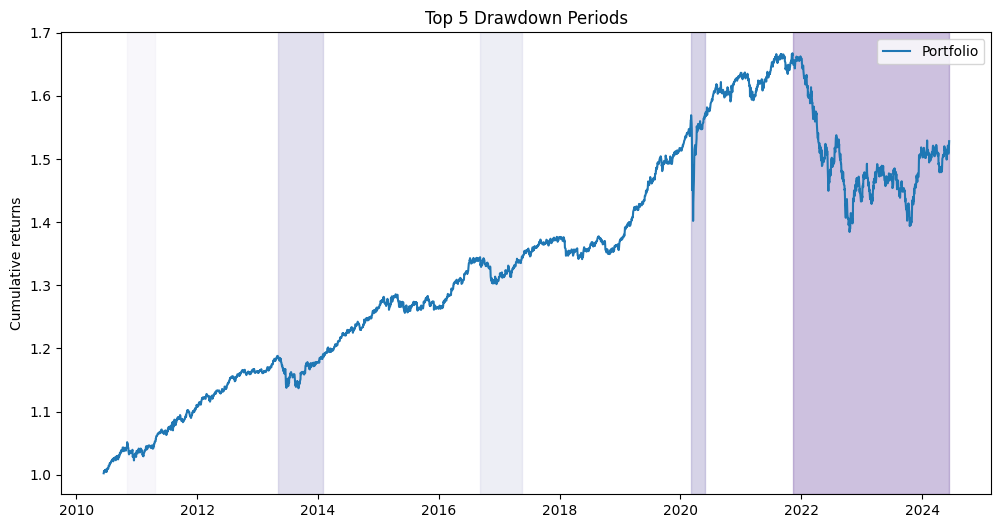

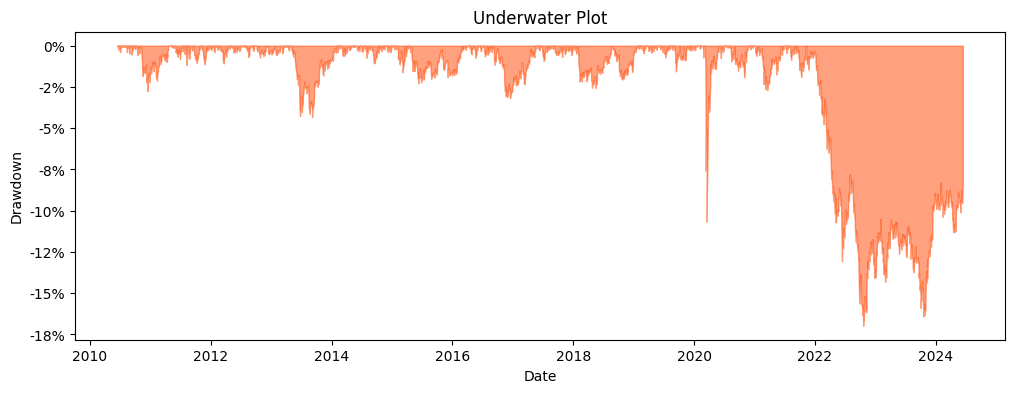

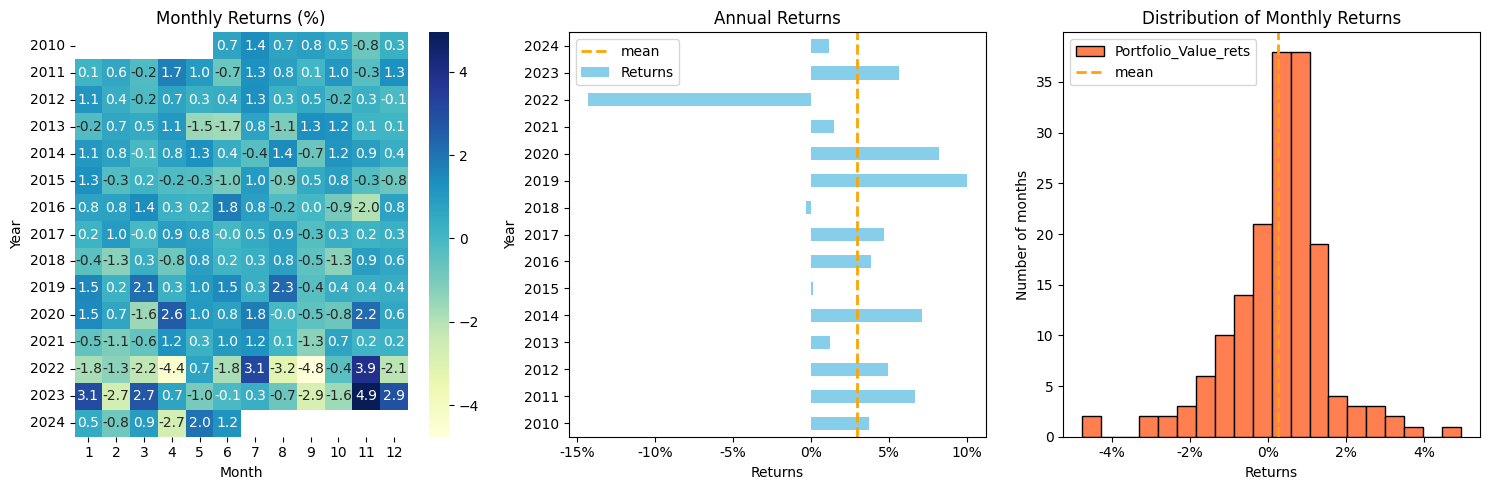

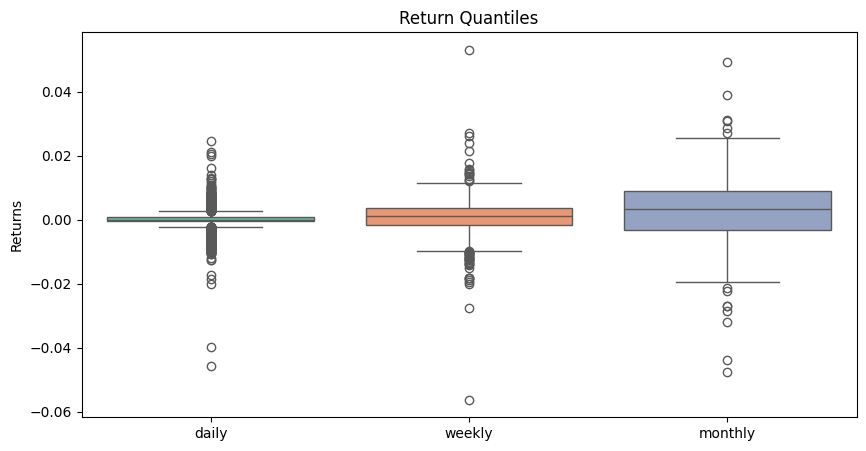

,Total Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Max Drawdown Date
0,0.528261,0.031392,0.04598,0.682733,-0.169727,2022-10-20


In [6]:
rebalance_portfolio(stocks, weights, stock_data, portfolio_value)